In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
test = pd.read_csv("./test.csv")
train = pd.read_csv("./train.csv")

# EDA

In [12]:
train.describe()

id    RhythmScore  AudioLoudness   VocalContent  \
count  524164.000000  524164.000000  524164.000000  524164.000000   
mean   262081.500000       0.632843      -8.379014       0.074443   
std    151313.257587       0.156899       4.616221       0.049939   
min         0.000000       0.076900     -27.509725       0.023500   
25%    131040.750000       0.515850     -11.551933       0.023500   
50%    262081.500000       0.634686      -8.252499       0.066425   
75%    393122.250000       0.739179      -4.912298       0.107343   
max    524163.000000       0.975000      -1.357000       0.256401   

       AcousticQuality  InstrumentalScore  LivePerformanceLikelihood  \
count    524164.000000      524164.000000              524164.000000   
mean          0.262913           0.117690                   0.178398   
std           0.223120           0.131845                   0.118186   
min           0.000005           0.000001                   0.024300   
25%           0.069413           0.000001                   0.077637   
50%           0.242502           0.074247                   0.166327   
75%           0.396957           0.204065                   0.268946   
max           0.995000           0.869258                   0.599924   

           MoodScore  TrackDurationMs         Energy  BeatsPerMinute  
count  524164.000000    524164.000000  524164.000000   524164.000000  
mean        0.555843    241903.692949       0.500923      119.034899  
std         0.225480     59326.601501       0.289952       26.468077  
min         0.025600     63973.000000       0.000067       46.718000  
25%         0.403921    207099.876625       0.254933      101.070410  
50%         0.564817    243684.058150       0.511800      118.747660  
75%         0.716633    281851.658500       0.746000      136.686590  
max         0.978000    464723.228100       1.000000      206.037000

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


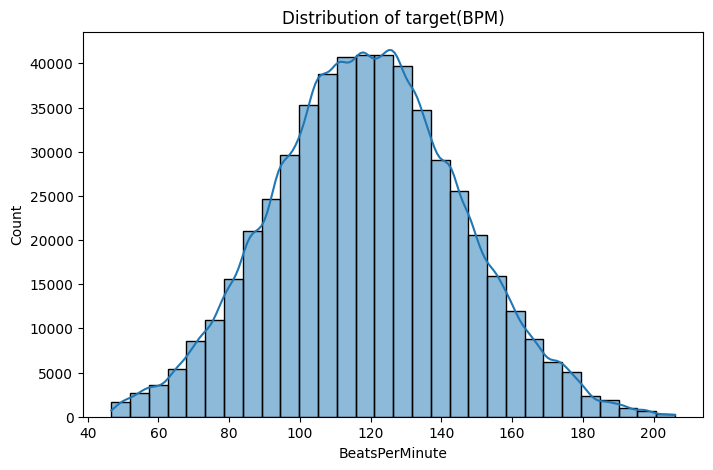

In [14]:

plt.figure(figsize=(8,5))
sns.histplot(train["BeatsPerMinute"], kde=True, bins=30)
plt.title(f"Distribution of target(BPM)")
plt.show()

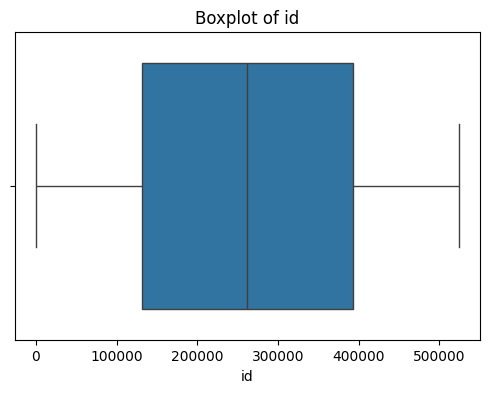

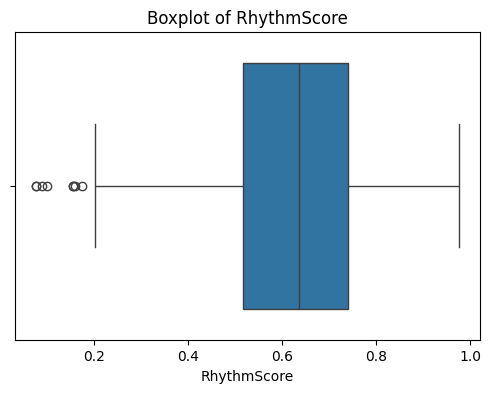

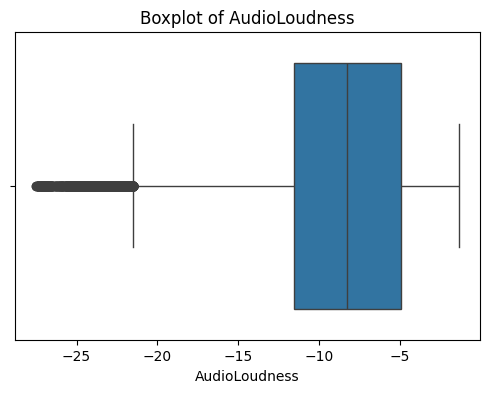

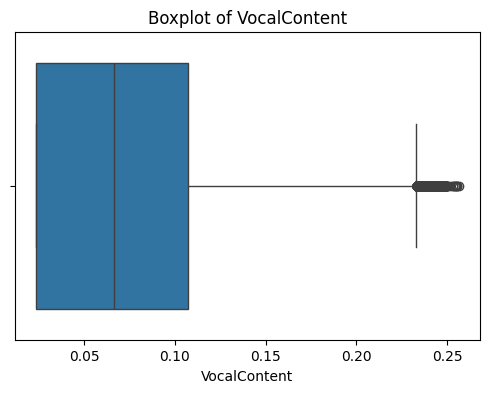

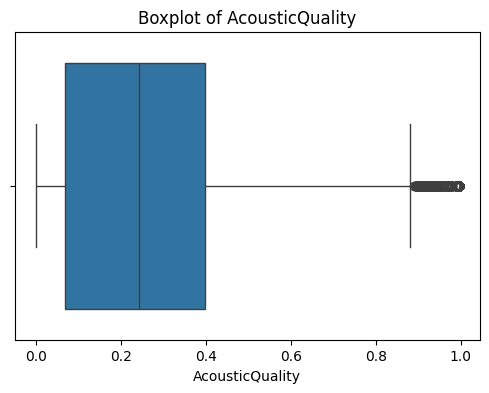

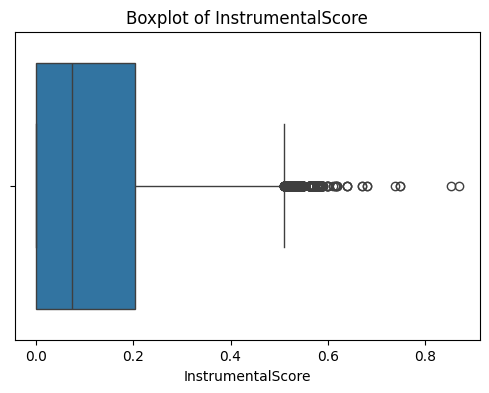

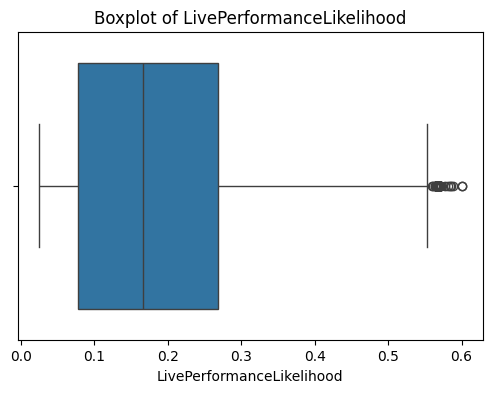

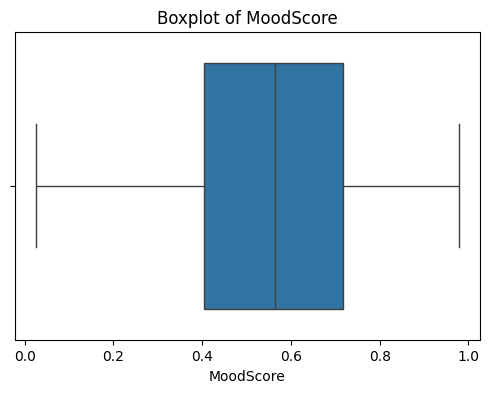

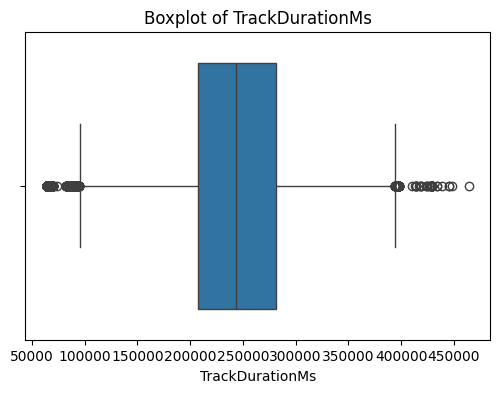

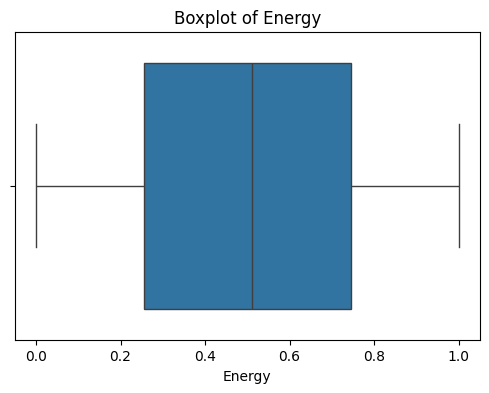

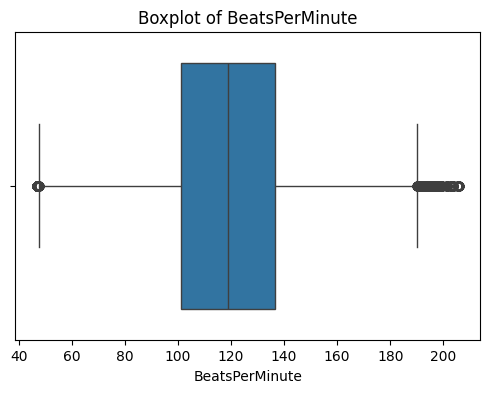

In [18]:
features = train.columns  

for col in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=train[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [22]:

def count_outliers_iqr(df):
    outlier_counts = {}
    for col in df.columns:
        # skip non-numeric
        if not pd.api.types.is_numeric_dtype(df[col]):
            continue
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr #Tukey’s rule, anything below lower or above upper is considered an outlier.
        upper = q3 + 1.5 * iqr #The 1.5 is a standard multiplier
        outlier_counts[col] = ((df[col] < lower) | (df[col] > upper)).sum()
    return pd.Series(outlier_counts)

outlier_summary = count_outliers_iqr(train)
print(outlier_summary)


id                              0
RhythmScore                     8
AudioLoudness                1770
VocalContent                 1245
AcousticQuality              6746
InstrumentalScore            2845
LivePerformanceLikelihood     129
MoodScore                       0
TrackDurationMs              4267
Energy                          0
BeatsPerMinute               2141
dtype: int64


In [20]:
outlier_pct = (outlier_summary / len(train)) * 100
print(outlier_pct)

id                           0.000000
RhythmScore                  0.001526
AudioLoudness                0.337681
VocalContent                 0.237521
AcousticQuality              1.287002
InstrumentalScore            0.542769
LivePerformanceLikelihood    0.024611
MoodScore                    0.000000
TrackDurationMs              0.814058
Energy                       0.000000
BeatsPerMinute               0.408460
dtype: float64


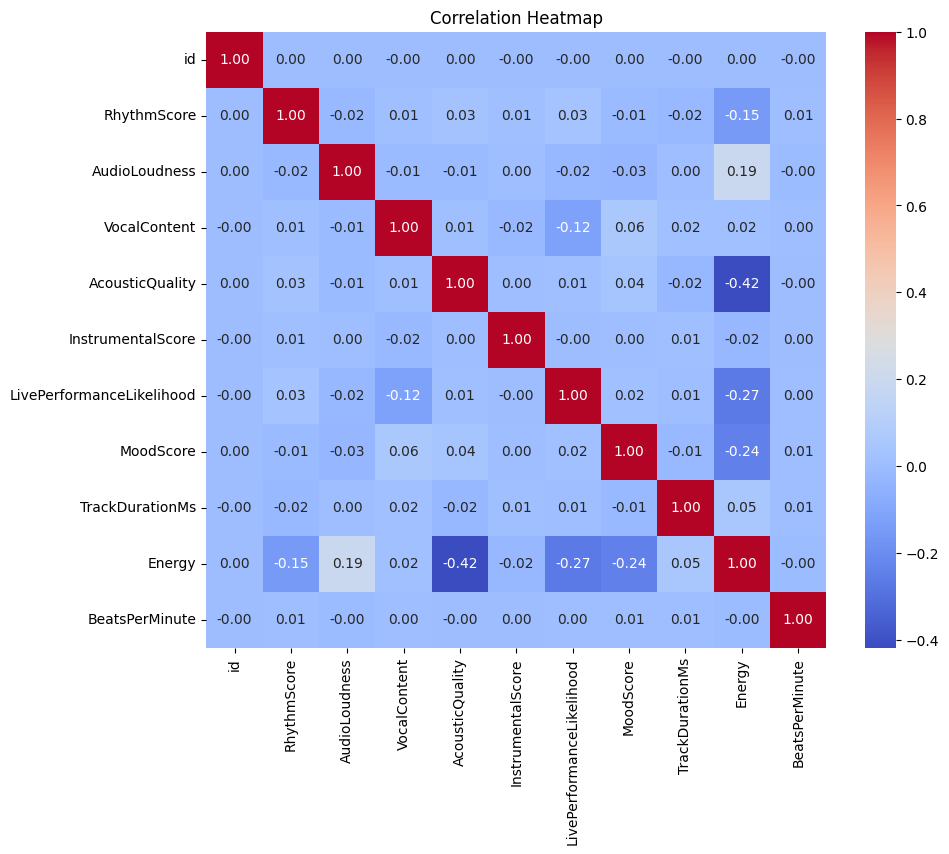

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(train[features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

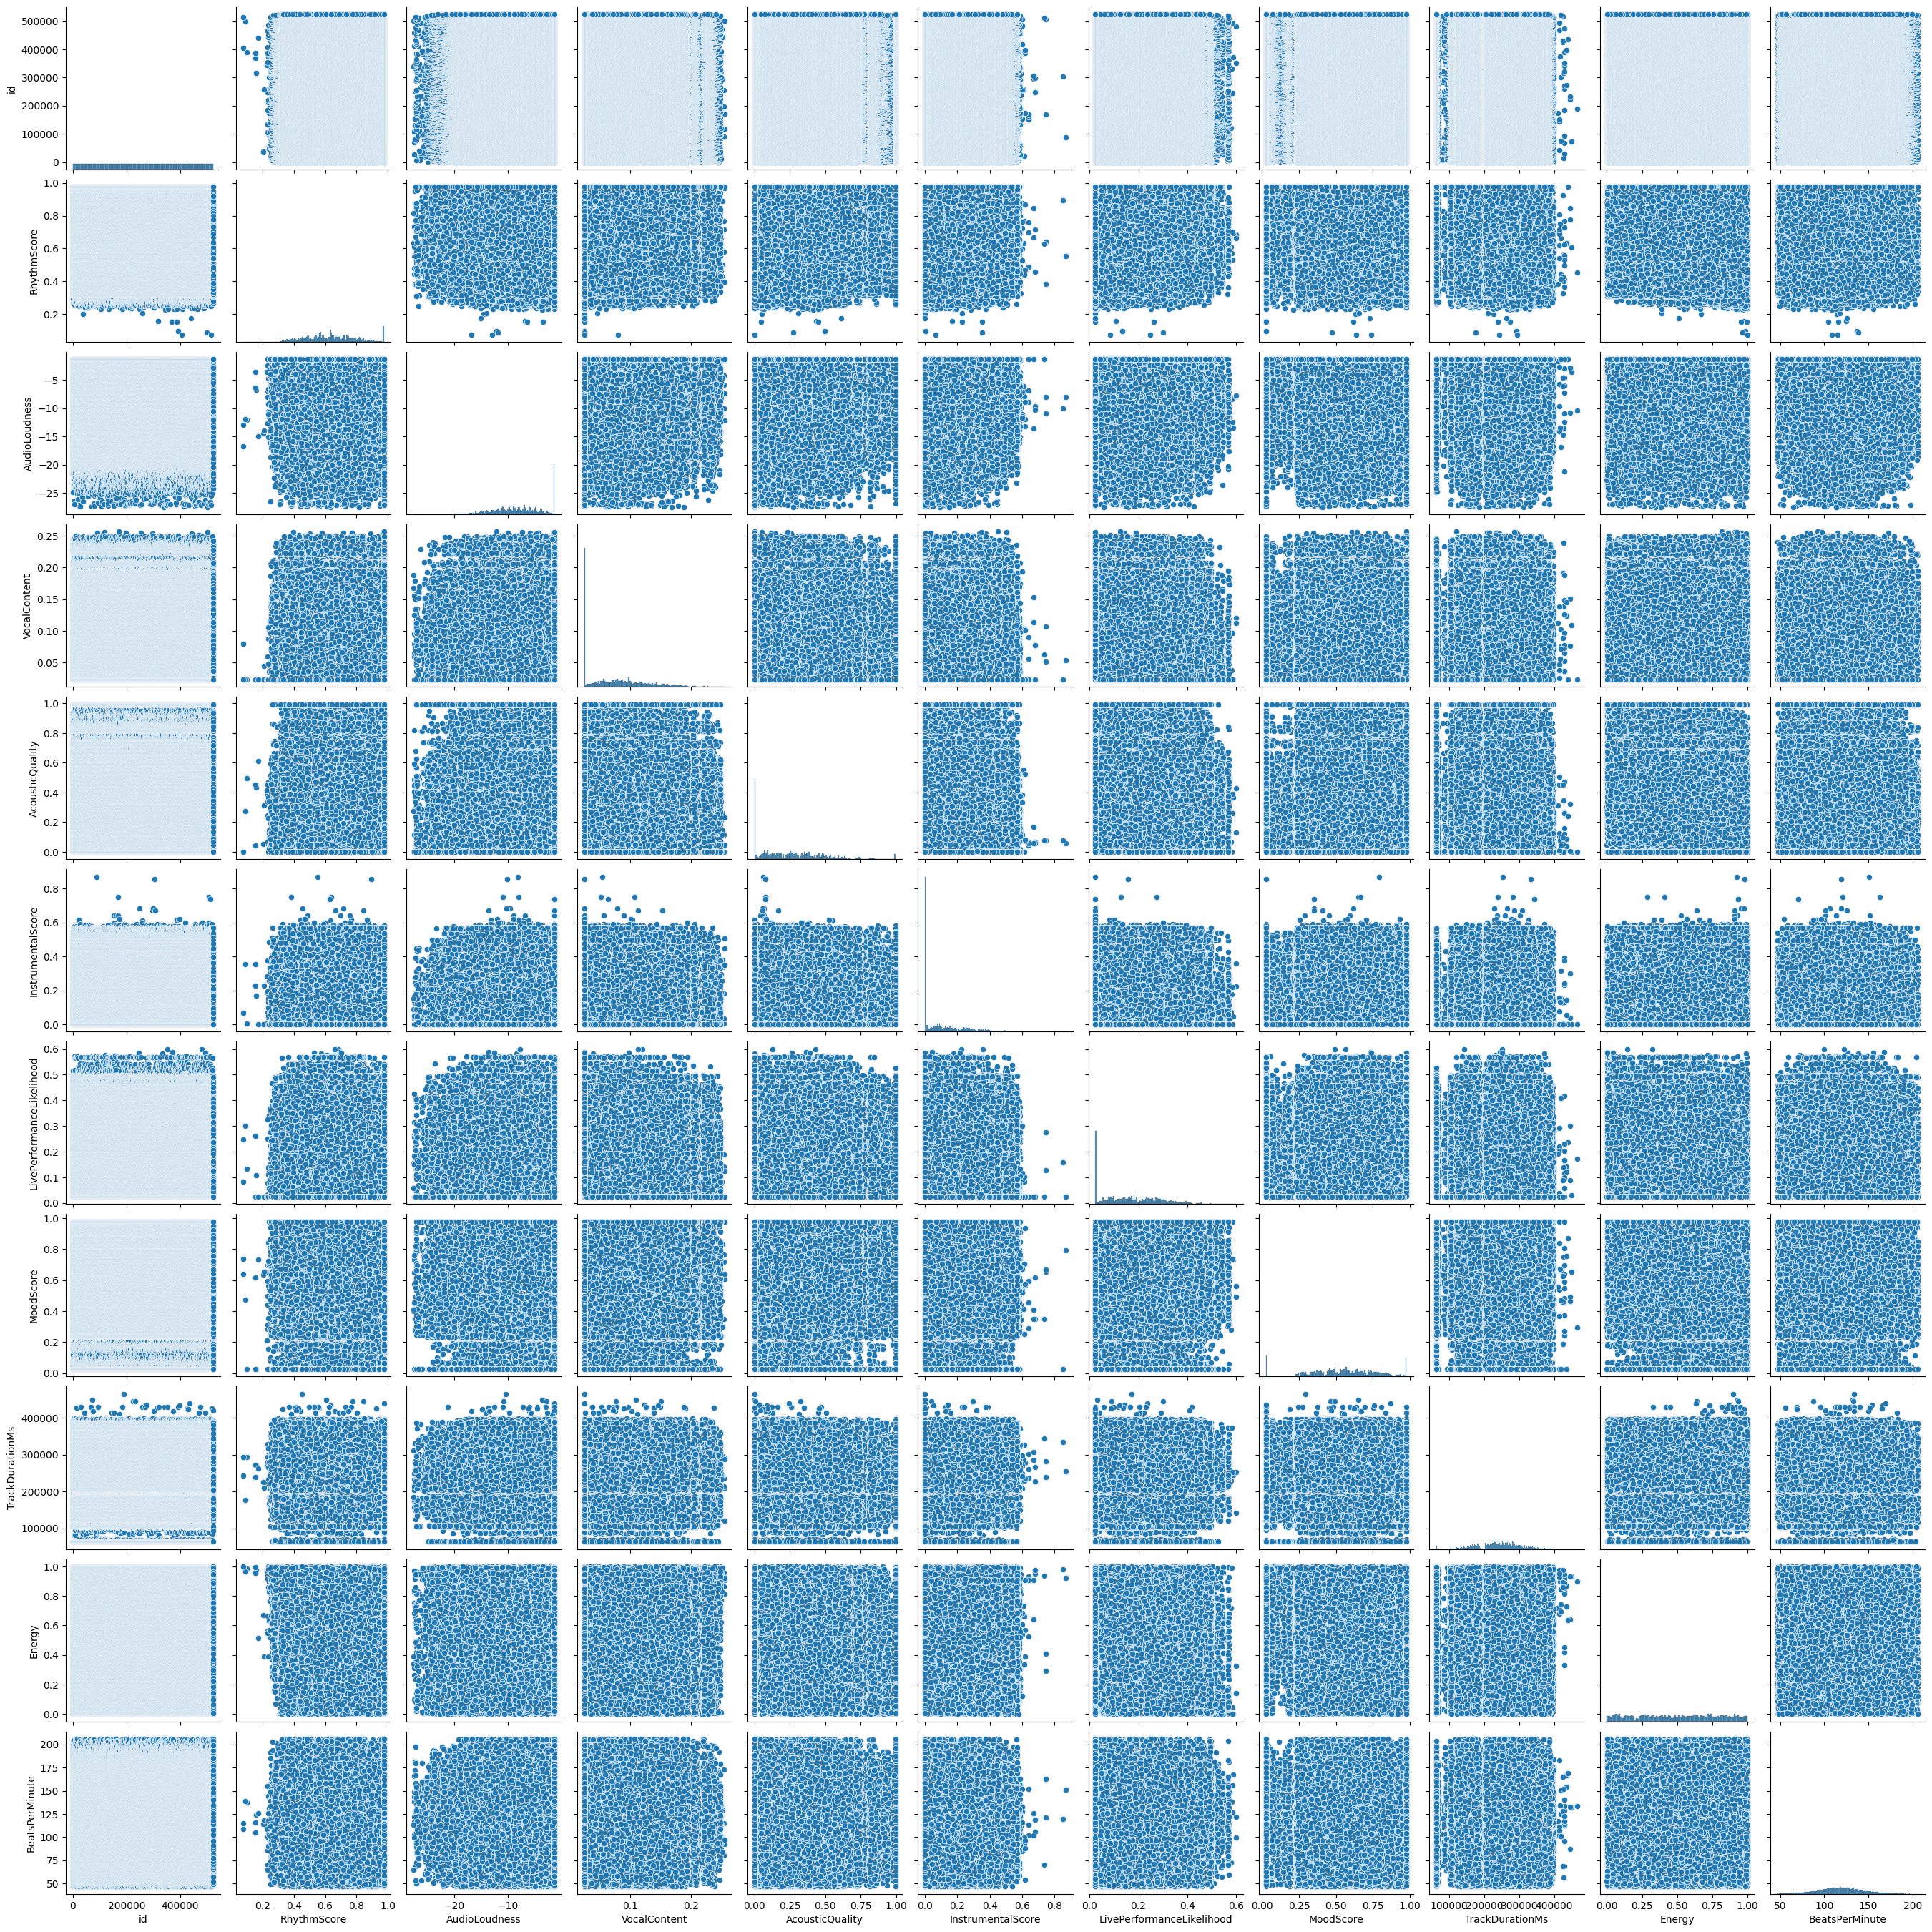

In [24]:
sns.pairplot(train[features])
plt.show()